In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Classification

from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=.3, random_state=2)

In [3]:
def plotDataset(x, y, axes):
    plt.plot(x[y==0, 0], x[y==0, 1], 'ro', markersize=3)
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)

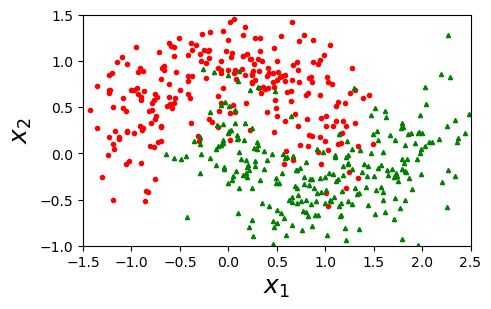

In [4]:
plt.figure(figsize=(5, 3))
plotDataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [6]:
#AdaBoostClassifier()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

treeClf = DecisionTreeClassifier(max_depth=1)

adaClf = AdaBoostClassifier(estimator=treeClf, n_estimators=200, learning_rate=.5, random_state=1)   #base_estimator 在新版本中已改成 estimator

In [7]:
adaClf.fit(xTrain, yTrain)
adaClf.score(xTrain, yTrain)

0.96

In [8]:
adaClf.score(xTest, yTest)

0.864

In [9]:
def plotDecisionBoundary(clf, x, y, axes=[-1.5, 2.45, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred)
    
    plotDataset(x, y, axes)

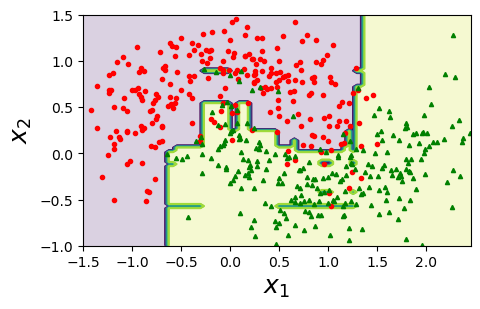

In [10]:
plt.figure(figsize=(5,3))
plotDecisionBoundary(adaClf, x, y)
plt.show()

In [11]:
#Regression

np.random.seed(1)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x[:, 0] - 0.5)**2 + np.random.randn(m)/10

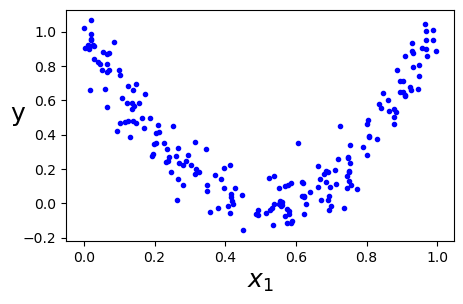

In [12]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', fontsize=18, rotation=0)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [14]:
#AdaBoostRegressor()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

treeReg = DecisionTreeRegressor(max_depth=3)

adaReg = AdaBoostRegressor(estimator=treeReg, n_estimators=200, learning_rate=.5, random_state=1)

In [15]:
adaReg.fit(xTrain, yTrain)
adaReg.score(xTrain, yTrain)

0.9002442201755443

In [16]:
adaReg.score(xTest, yTest)

0.9022467390432937

In [17]:
#Model

def plotRegressionPredictions(model, x, y, axes=[0, 1, -.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    yPred = model.predict(x1)
    
    plt.plot(x, y, 'b.')
    plt.plot(x1, yPred, 'r-', linewidth=2, label='$\hat{y}$')
    
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('y', fontsize=18, rotation=0)
    plt.legend(loc='upper center', fontsize=14)

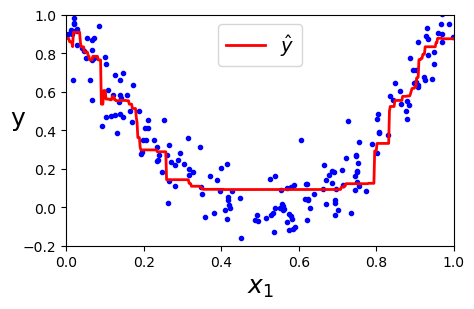

In [18]:
plt.figure(figsize=(5, 3))
plotRegressionPredictions(adaReg, x, y)
plt.show()